<a href="https://colab.research.google.com/github/LiFeLeSS5858/POMM/blob/main/Puasson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

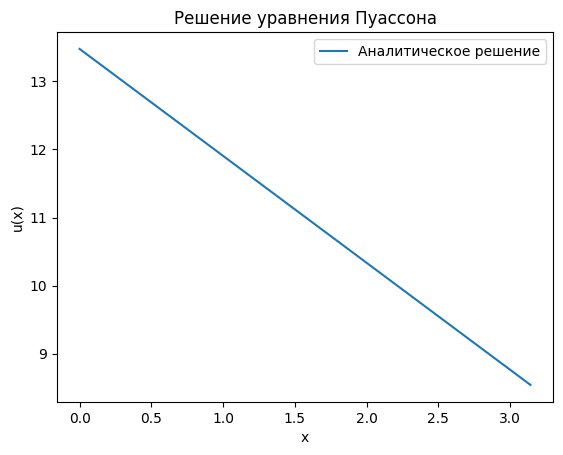

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def analytical_solution(x, a, b, A, B, f):
    # Аналитическое решение уравнения Пуассона
    # u(x) = C1*x + C2 + integral(f(x)*x, x) + A, где C1 и C2 - константы
    # integral(f(x)*x, x) - неопределенный интеграл от f(x)*x по x

    # Находим константы C1 и C2 из граничных условий
    C1 = (B - A - b**2 + a**2) / (2 * (b - a))
    C2 = A - C1 * a - a**2

    # Аналитическое решение
    u = C1 * x + C2 + (x**3 - a**3) / 3 - (x**3 - b**3) / 3 + np.trapz(f(x) * x, x)

    return u

# Задаем функцию f(x)
def f(x):
    return np.sin(x)

# Задаем интервал [a, b] и количество точек для построения графика
a, b = 0, np.pi
num_points = 100

# Генерируем точки на интервале [a, b]
x_values = np.linspace(a, b, num_points)

# Вычисляем аналитическое решение
analytical_solution_values = analytical_solution(x_values, a, b, 0, 0, f)

# Строим график
plt.plot(x_values, analytical_solution_values, label='Аналитическое решение')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.title('Решение уравнения Пуассона')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/scipy/sparse/linalg/_dsolve/linsolve.py:229: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',


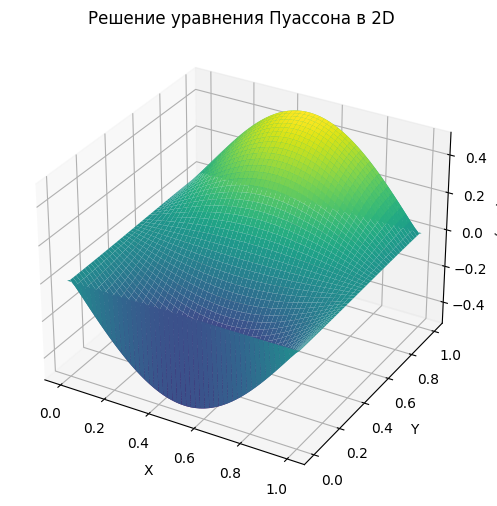

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve

def poisson_solver_2d(nx, ny, Lx, Ly, f, boundary_conditions):
    # Функция для численного решения двумерного уравнения Пуассона

    # Генерация равномерной сетки
    x = np.linspace(0, Lx, nx)
    y = np.linspace(0, Ly, ny)
    X, Y = np.meshgrid(x, y)

    # Инициализация матрицы f на сетке
    F = f(X, Y)

    # Применение граничных условий
    F[0, :] = boundary_conditions['bottom']
    F[-1, :] = boundary_conditions['top']
    F[:, 0] = boundary_conditions['left']
    F[:, -1] = boundary_conditions['right']

    # Формирование матрицы системы
    main_diag = -4 * np.ones((nx * ny,))
    off_diag = np.ones((nx * ny - 1,))
    off_diag[nx-1::nx] = 0  # учтем граничные условия по x
    off_diag[nx-1::nx] = 0  # учтем граничные условия по y

    A = diags([main_diag, off_diag, off_diag], [0, -1, 1], shape=(nx * ny, nx * ny)).toarray()

    # Решение системы линейных уравнений
    u = spsolve(A, F.flatten())

    # Решение преобразуется обратно в двумерный массив
    u = u.reshape((ny, nx))

    return X, Y, u

# Определение функции f(x, y)
def f(x, y):
    return np.sin(np.pi * x) * np.cos(np.pi * y)

# Размеры сетки и области
nx, ny = 50, 50
Lx, Ly = 1.0, 1.0

# Граничные условия
boundary_conditions = {
    'left': np.zeros((ny,)),
    'right': np.zeros((ny,)),
    'bottom': np.zeros((nx,)),
    'top': np.zeros((nx,))
}

# Размеры сетки и области
nx, ny = 50, 50
Lx, Ly = 1.0, 1.0

# Решение уравнения Пуассона
X, Y, u = poisson_solver_2d(nx, ny, Lx, Ly, f, boundary_conditions)

# Визуализация решения
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, u, cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('u(x, y)')
ax.set_title('Решение уравнения Пуассона в 2D')
plt.show()

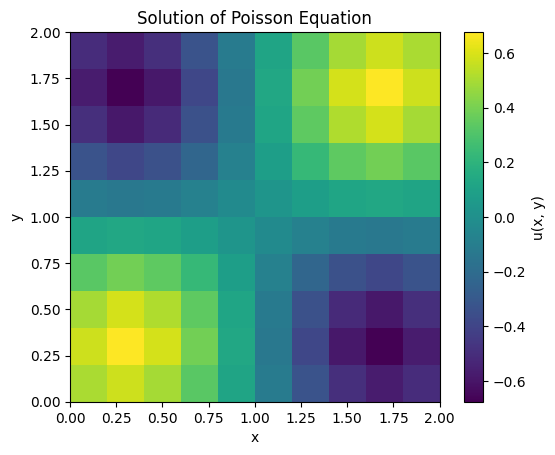

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import dblquad
from mpl_toolkits.mplot3d import Axes3D
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve

def green_function(x, y, xi, eta):
    # Избегаем деления на ноль
    distance_squared = (x - xi)**2 + (y - eta)**2
    return -np.log(np.where(distance_squared > 0, np.sqrt(distance_squared), 1e-10))

def poisson_equation_solver(f, domain, num_points):
    xmin, xmax, ymin, ymax = domain
    x = np.linspace(xmin, xmax, num_points)
    y = np.linspace(ymin, ymax, num_points)
    X, Y = np.meshgrid(x, y)

    u = np.zeros_like(X)

    for i in range(num_points):
        for j in range(num_points):
            integrand = lambda xi, eta: f(xi, eta) * green_function(X[i, j], Y[i, j], xi, eta)
            u[i, j], _ = dblquad(integrand, xmin, xmax, lambda x: ymin, lambda x: ymax)

    return u

def example_poisson_equation_solver():
    # Задаем функцию f(x, y)
    def f(x, y):
        return 2 * (x - 1) * (y - 1)

    # Определяем область
    domain = (0, 2, 0, 2)

    # Решаем уравнение Пуассона
    num_points = 10
    u = poisson_equation_solver(f, domain, num_points)

    # Выводим результат с использованием matplotlib
    plt.imshow(u, extent=domain, origin='lower', cmap='viridis')
    plt.colorbar(label='u(x, y)')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Solution of Poisson Equation')
    plt.show()
if __name__ == "__main__":
    example_poisson_equation_solver()

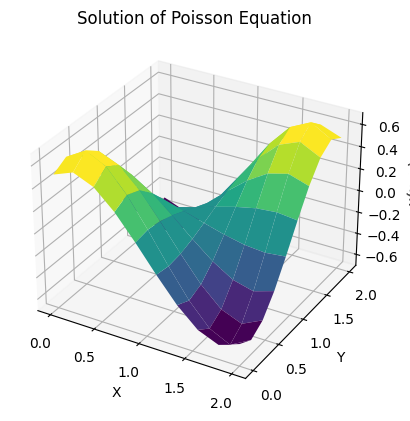

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import dblquad
from mpl_toolkits.mplot3d import Axes3D
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve

def green_function(x, y, xi, eta):
    distance_squared = (x - xi)**2 + (y - eta)**2
    return -np.log(np.where(distance_squared > 0, np.sqrt(distance_squared), 1e-10))

def poisson_equation_solver(f, domain, num_points):
    xmin, xmax, ymin, ymax = domain
    x = np.linspace(xmin, xmax, num_points)
    y = np.linspace(ymin, ymax, num_points)
    X, Y = np.meshgrid(x, y)

    u = np.zeros_like(X)

    for i in range(num_points):
        for j in range(num_points):
            integrand = lambda xi, eta: f(xi, eta) * green_function(X[i, j], Y[i, j], xi, eta)
            u[i, j], _ = dblquad(integrand, xmin, xmax, lambda x: ymin, lambda x: ymax)

    return u, X, Y

def example_poisson_equation_solver():
    def f(x, y):
        return 2 * (x - 1) * (y - 1)

    domain = (0, 2, 0, 2)

    num_points = 10
    u, X, Y = poisson_equation_solver(f, domain, num_points)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, u, cmap='viridis')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('u(x, y)')
    ax.set_title('Solution of Poisson Equation')

    plt.show()

if __name__ == "__main__":
    example_poisson_equation_solver()

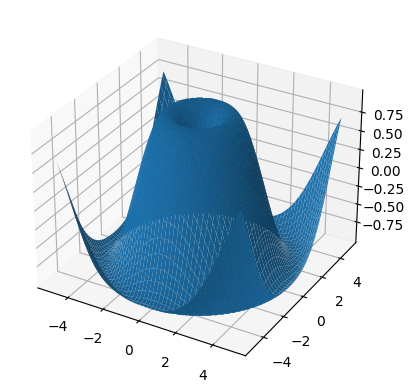

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the function to plot
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

# Create the mesh grid
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)

# Evaluate the function at each point on the grid
Z = f(X, Y)

# Create the 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z)

# Show the plot
plt.show()

/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadpack_py.py:1233: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


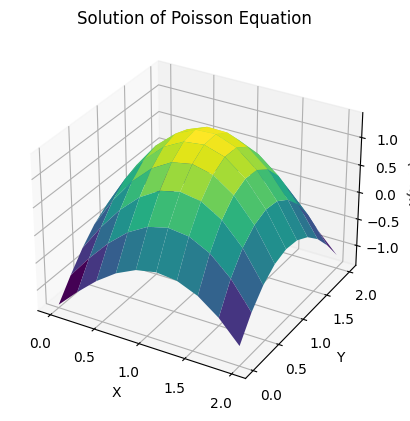

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import dblquad
from mpl_toolkits.mplot3d import Axes3D
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve

def green_function(x, y, xi, eta):
    distance_squared = (x - xi)**2 + (y - eta)**2
    return -np.log(np.where(distance_squared > 0, np.sqrt(distance_squared), 1e-10))

def poisson_equation_solver(f, domain, num_points):
    xmin, xmax, ymin, ymax = domain
    x = np.linspace(xmin, xmax, num_points)
    y = np.linspace(ymin, ymax, num_points)
    X, Y = np.meshgrid(x, y)

    u = np.zeros_like(X)

    for i in range(num_points):
        for j in range(num_points):
            integrand = lambda xi, eta: f(xi, eta) * green_function(X[i, j], Y[i, j], xi, eta)
            u[i, j], _ = dblquad(integrand, xmin, xmax, lambda x: ymin, lambda x: ymax)

    return u, X, Y

def example_poisson_equation_solver():
    def f(x, y):
        return np.sin(np.sqrt(x ** 2 + y ** 2))

    domain = (0, 2, 0, 2)

    num_points = 10
    u, X, Y = poisson_equation_solver(f, domain, num_points)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, u, cmap='viridis')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('u(x, y)')
    ax.set_title('Solution of Poisson Equation')

    plt.show()

if __name__ == "__main__":
    example_poisson_equation_solver()